### SiC MOSFET - C2M1000170D
#### Ouliers Analysis and Removal using KDE and Box plots Visualisation 

- KDE plots
- Boxplots
- IQR-based outlier counts per column
(Optional exploring -Apply KMeans clustering, PCA)

*And final plotting and Detailed Summary Analysis of IQR-based outlier counts per column*

Loaded: mosfets_step2_no_zeros/C2M1000170D_no_zeros.csv with 130528 rows

KDE plots:


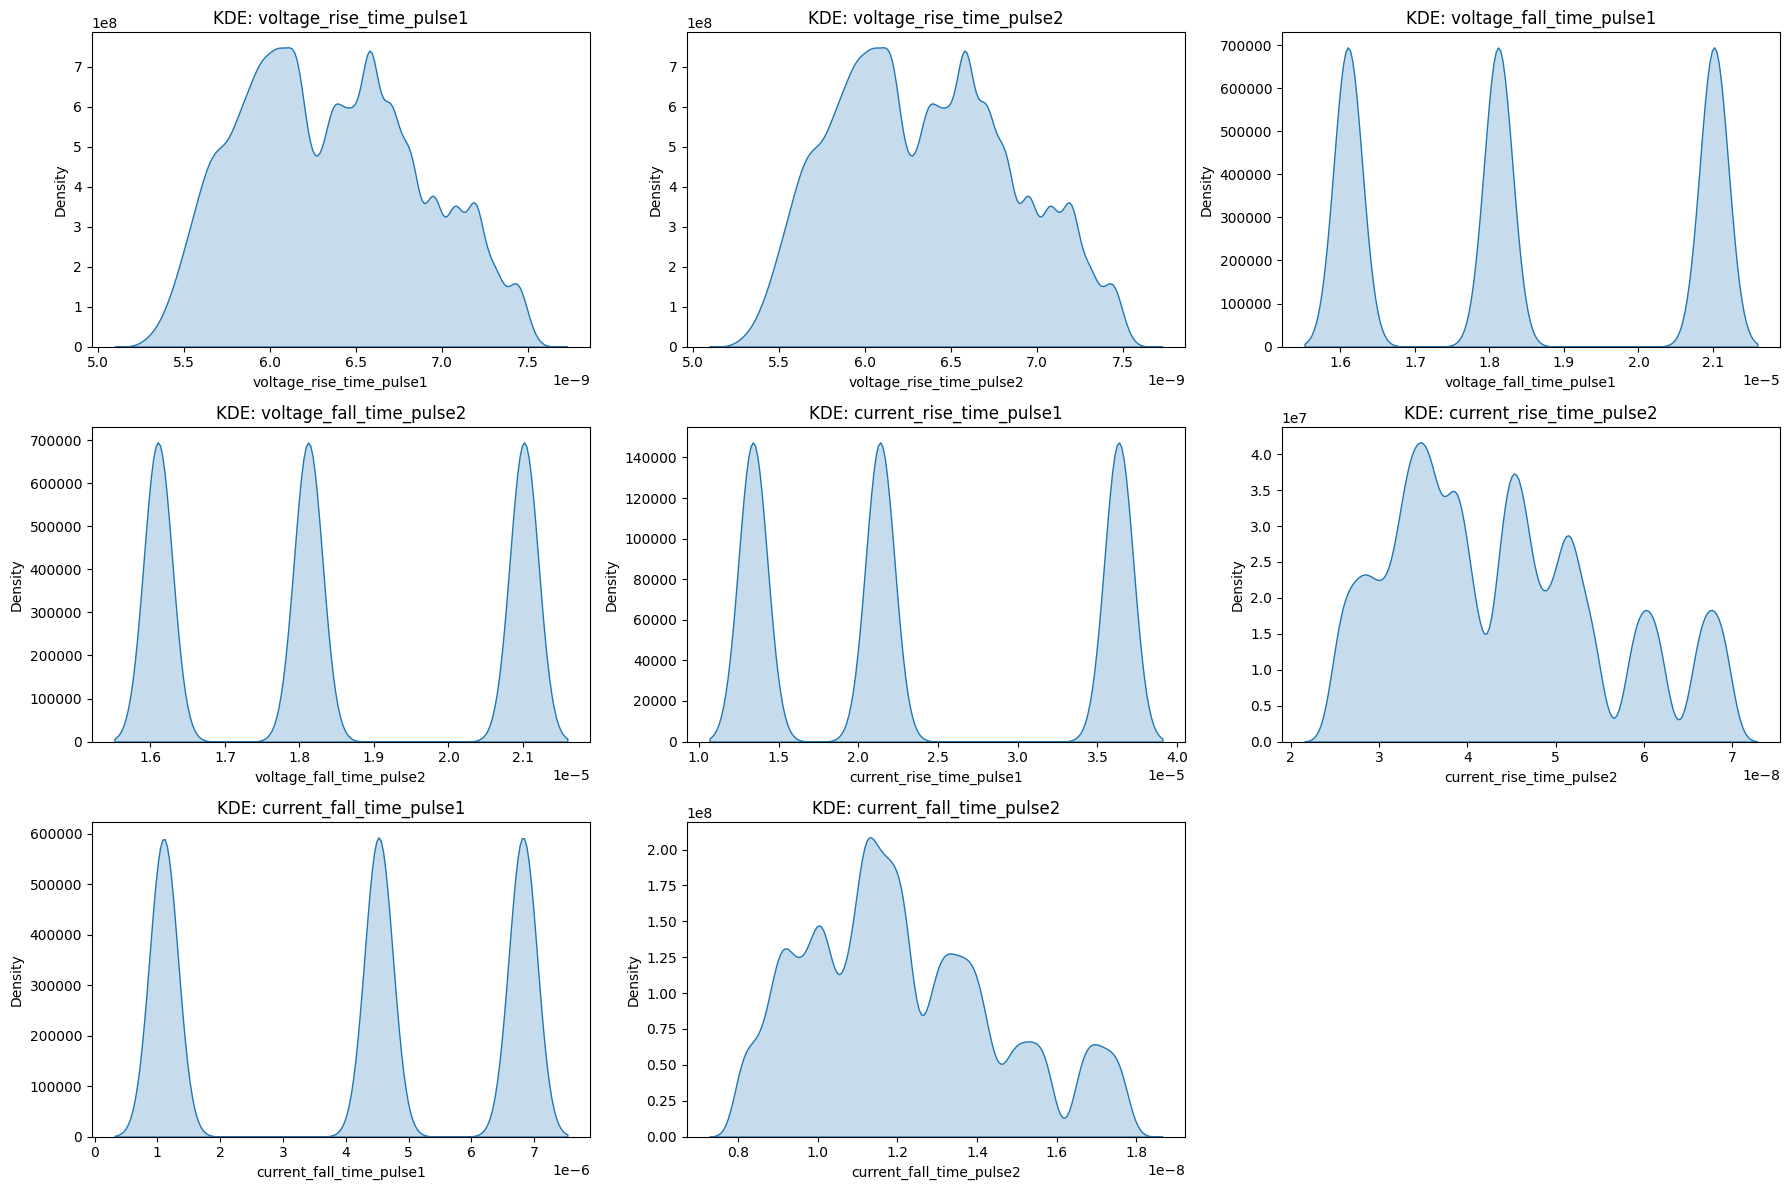

 Boxplots:


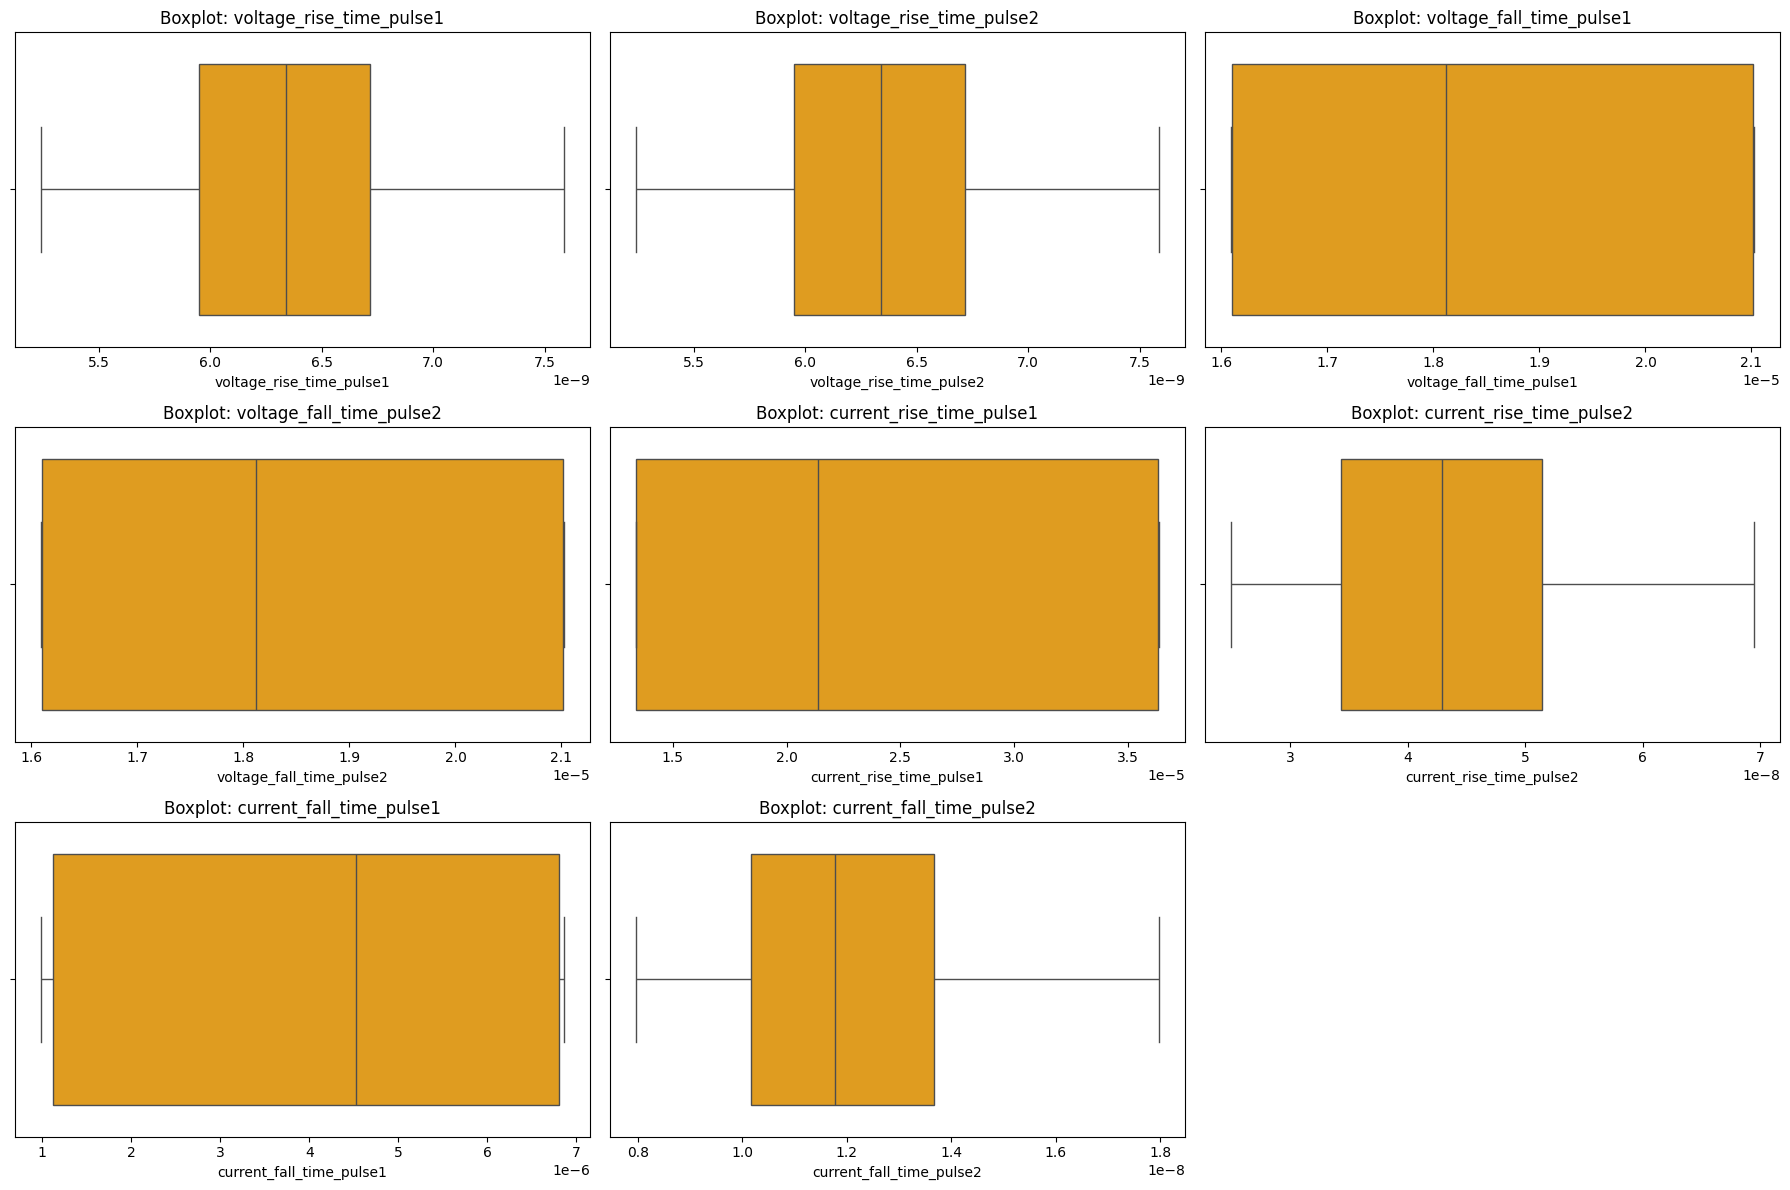

,count,mean,std,min,25%,50%,75%,max,range
voltage_rise_time_pulse1,130528.0,6.400000e-09,5.000000e-10,5.200000e-09,6.000000e-09,6.300000e-09,6.700000e-09,7.600000e-09,2.300000e-09
voltage_rise_time_pulse2,130528.0,6.400000e-09,5.000000e-10,5.200000e-09,6.000000e-09,6.300000e-09,6.700000e-09,7.600000e-09,2.300000e-09
voltage_fall_time_pulse1,130528.0,1.841080e-05,2.016900e-06,1.609140e-05,1.610390e-05,1.811690e-05,2.100990e-05,2.102240e-05,4.931000e-06
voltage_fall_time_pulse2,130528.0,1.841080e-05,2.016900e-06,1.609140e-05,1.610390e-05,1.811690e-05,2.100990e-05,2.102240e-05,4.931000e-06
current_rise_time_pulse1,130528.0,2.369960e-05,9.510000e-06,1.338030e-05,1.340070e-05,2.136760e-05,3.632350e-05,3.636540e-05,2.298510e-05
current_rise_time_pulse2,130528.0,4.370000e-08,1.190000e-08,2.490000e-08,3.430000e-08,4.290000e-08,5.140000e-08,6.940000e-08,4.450000e-08
current_fall_time_pulse1,130528.0,4.148100e-06,2.350400e-06,9.876000e-07,1.122400e-06,4.522500e-06,6.802500e-06,6.859800e-06,5.872200e-06
current_fall_time_pulse2,130528.0,1.210000e-08,2.400000e-09,8.000000e-09,1.020000e-08,1.180000e-08,1.370000e-08,1.800000e-08,1.000000e-08


IQR-based outlier counts per column:

voltage_rise_time_pulse1: 0 outliers
voltage_rise_time_pulse2: 0 outliers
voltage_fall_time_pulse1: 0 outliers
voltage_fall_time_pulse2: 0 outliers
current_rise_time_pulse1: 0 outliers
current_rise_time_pulse2: 0 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Loading the dataset of the mosfet C2M1000170D to remove the outliers 
FILE_PATH = "mosfets_step2_no_zeros/C2M1000170D_no_zeros.csv"  # Replace with other MOSFET file
df = pd.read_csv(FILE_PATH)

# The time columns from the output or target 
time_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]
# Just a quick display to check the right file and the rows 
print(f"Loaded: {FILE_PATH} with {len(df)} rows\n")
# KDE plotting for understanding the distribution and outliers
print("KDE plots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Box Plots for the ouliers
print(" Boxplots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Adding the range and min and max to check 
describe_df = df[time_columns].describe().T
describe_df["range"] = describe_df["max"] - describe_df["min"]
display(describe_df.round(10))

# VERY IMPOTANT FOR UNDERSTANDING THE DISTRIBUTION
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


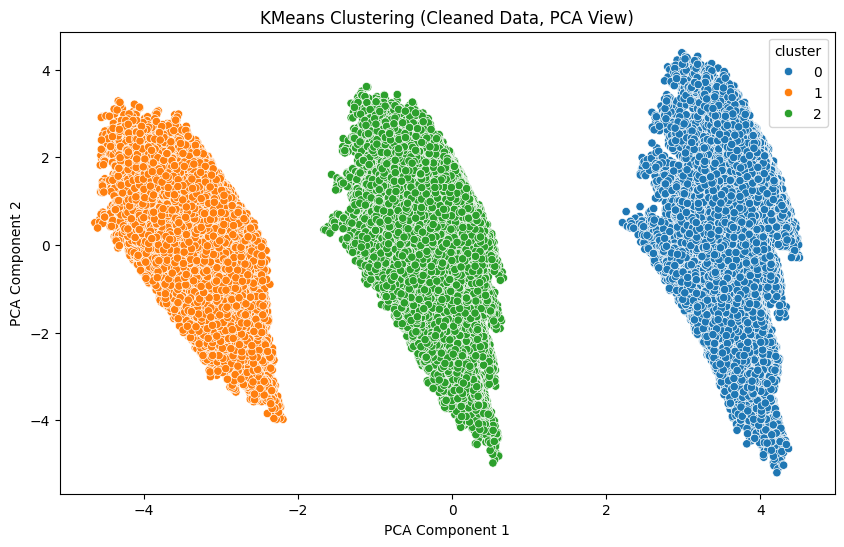


EMI Mean per Cluster:
         overshoot_pulse_1  overshoot_pulse_2  undershoot_pulse_1  \
cluster                                                             
0                  24.0991          -774.8674            -66.0511   
1                  25.7771         -1182.0643            -53.6357   
2                  25.8309          -978.6270            -60.3121   

         undershoot_pulse_2  ringing_frequency_MHz  
cluster                                             
0                  -67.0293               172.8897  
1                  -57.3790               179.8407  
2                  -62.6377               176.8532  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

time_cols = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]

emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

Q1 = df['voltage_rise_time_pulse1'].quantile(0.25)
Q3 = df['voltage_rise_time_pulse1'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

features_for_clustering = time_cols + emi_cols
df_cleaned = df.copy()
data = df_cleaned[features_for_clustering].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3 KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['cluster'] = clusters

# PCA Visualisation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering (Cleaned Data, PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

print("\nEMI Mean per Cluster:")
print(data.groupby("cluster")[emi_cols].mean().round(4))


KDE plots for EMI columns:


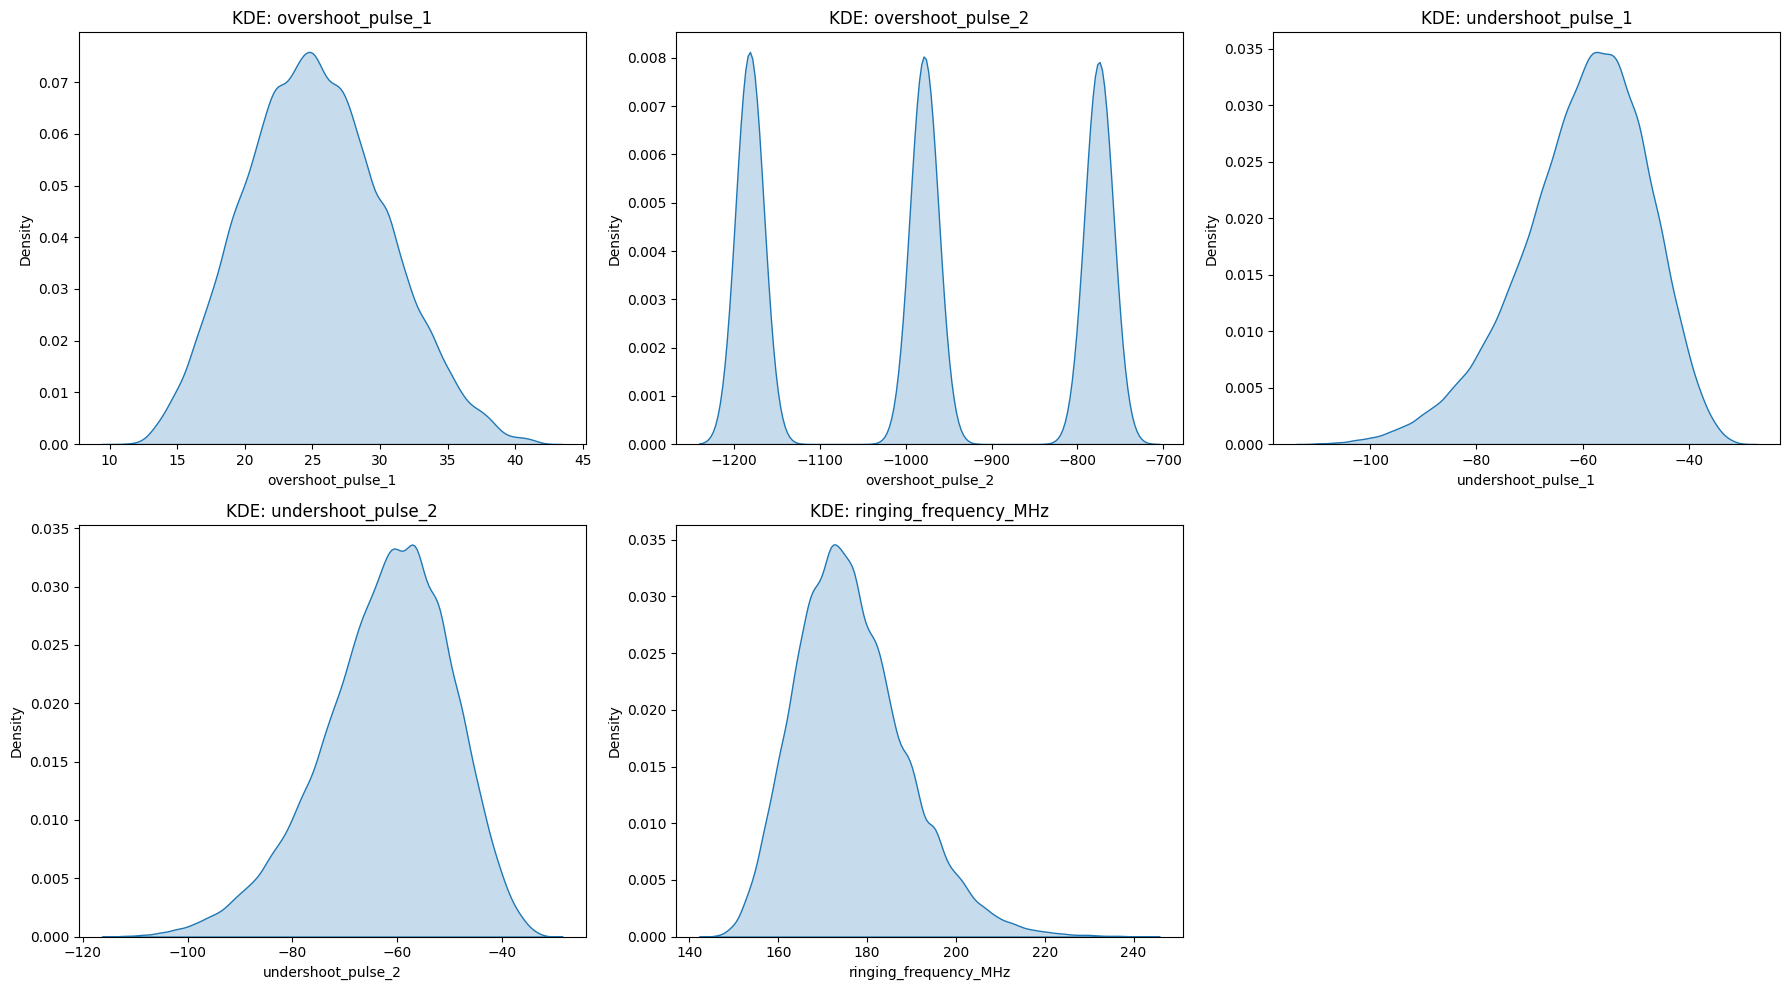

Boxplots for EMI columns:


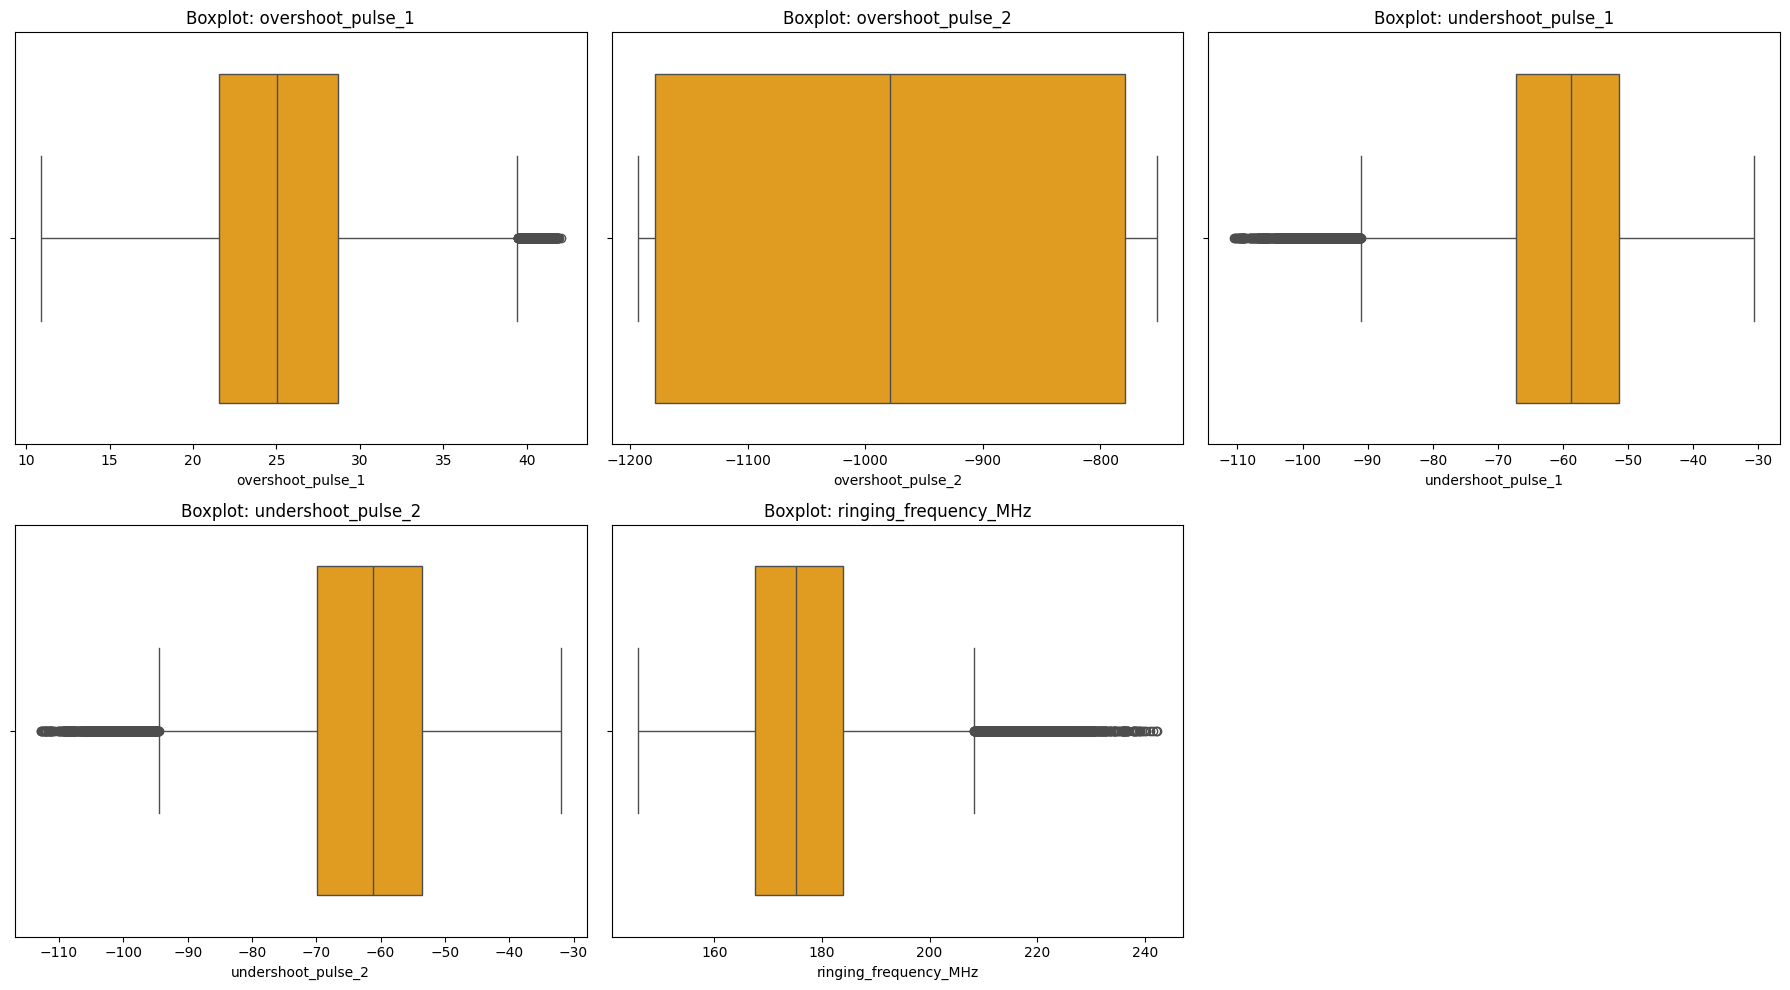

,count,mean,std,min,25%,50%,75%,max,range
overshoot_pulse_1,130528.0,25.2357,5.1291,10.8830,21.5435,25.0421,28.7145,42.0328,31.1498
overshoot_pulse_2,130528.0,-978.5087,166.3140,-1193.8063,-1179.2311,-978.9280,-778.9741,-751.4117,442.3947
undershoot_pulse_1,130528.0,-60.0000,12.0031,-110.4809,-67.2505,-58.6895,-51.3578,-30.6263,79.8545
undershoot_pulse_2,130528.0,-62.3489,12.2806,-112.8373,-69.9158,-61.1479,-53.5001,-32.0192,80.8181
ringing_frequency_MHz,130528.0,176.5277,12.4424,145.7061,167.6171,175.1523,183.9032,242.3438,96.6378


IQR-based outlier counts for EMI columns:

overshoot_pulse_1: 354 outliers
overshoot_pulse_2: 0 outliers
undershoot_pulse_1: 1765 outliers
undershoot_pulse_2: 1543 outliers
ringing_frequency_MHz: 1979 outliers


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]
print("KDE plots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(emi_cols):
    sns.kdeplot(df_cleaned[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#Boxplots
print("Boxplots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(emi_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

describe_emi = df_cleaned[emi_cols].describe().T
describe_emi["range"] = describe_emi["max"] - describe_emi["min"]
display(describe_emi.round(4))

print("IQR-based outlier counts for EMI columns:\n")
for col in emi_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Null Value Count Per Target Column:
Series([], dtype: int64)

Negative Value Count (Rise/Fall Columns Only):
Series([], dtype: int64)

Final IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,1.088300e+01,4.203284e+01,1.078688e+01,3.947108e+01,354.0,3.114984e+01
overshoot_pulse_2,-1.193806e+03,-7.514117e+02,-1.779617e+03,-1.785886e+02,0.0,4.423947e+02
undershoot_pulse_1,-1.104809e+02,-3.062632e+01,-9.108950e+01,-2.751882e+01,1765.0,7.985454e+01
undershoot_pulse_2,-1.128373e+02,-3.201923e+01,-9.453933e+01,-2.887654e+01,1543.0,8.081805e+01
ringing_frequency_MHz,1.457061e+02,2.423438e+02,1.431880e+02,2.083323e+02,1979.0,9.663776e+01
voltage_rise_time_pulse1,5.240348e-09,7.586011e-09,4.800773e-09,7.866408e-09,0.0,2.345663e-09
voltage_rise_time_pulse2,5.240348e-09,7.586011e-09,4.800773e-09,7.866408e-09,0.0,2.345663e-09
voltage_fall_time_pulse1,1.609139e-05,2.102240e-05,8.744879e-06,2.836891e-05,0.0,4.931010e-06
voltage_fall_time_pulse2,1.609139e-05,2.102240e-05,8.744879e-06,2.836891e-05,0.0,4.931010e-06
current_rise_time_pulse1,1.338025e-05,3.636540e-05,-2.098352e-05,7.070769e-05,0.0,2.298515e-05


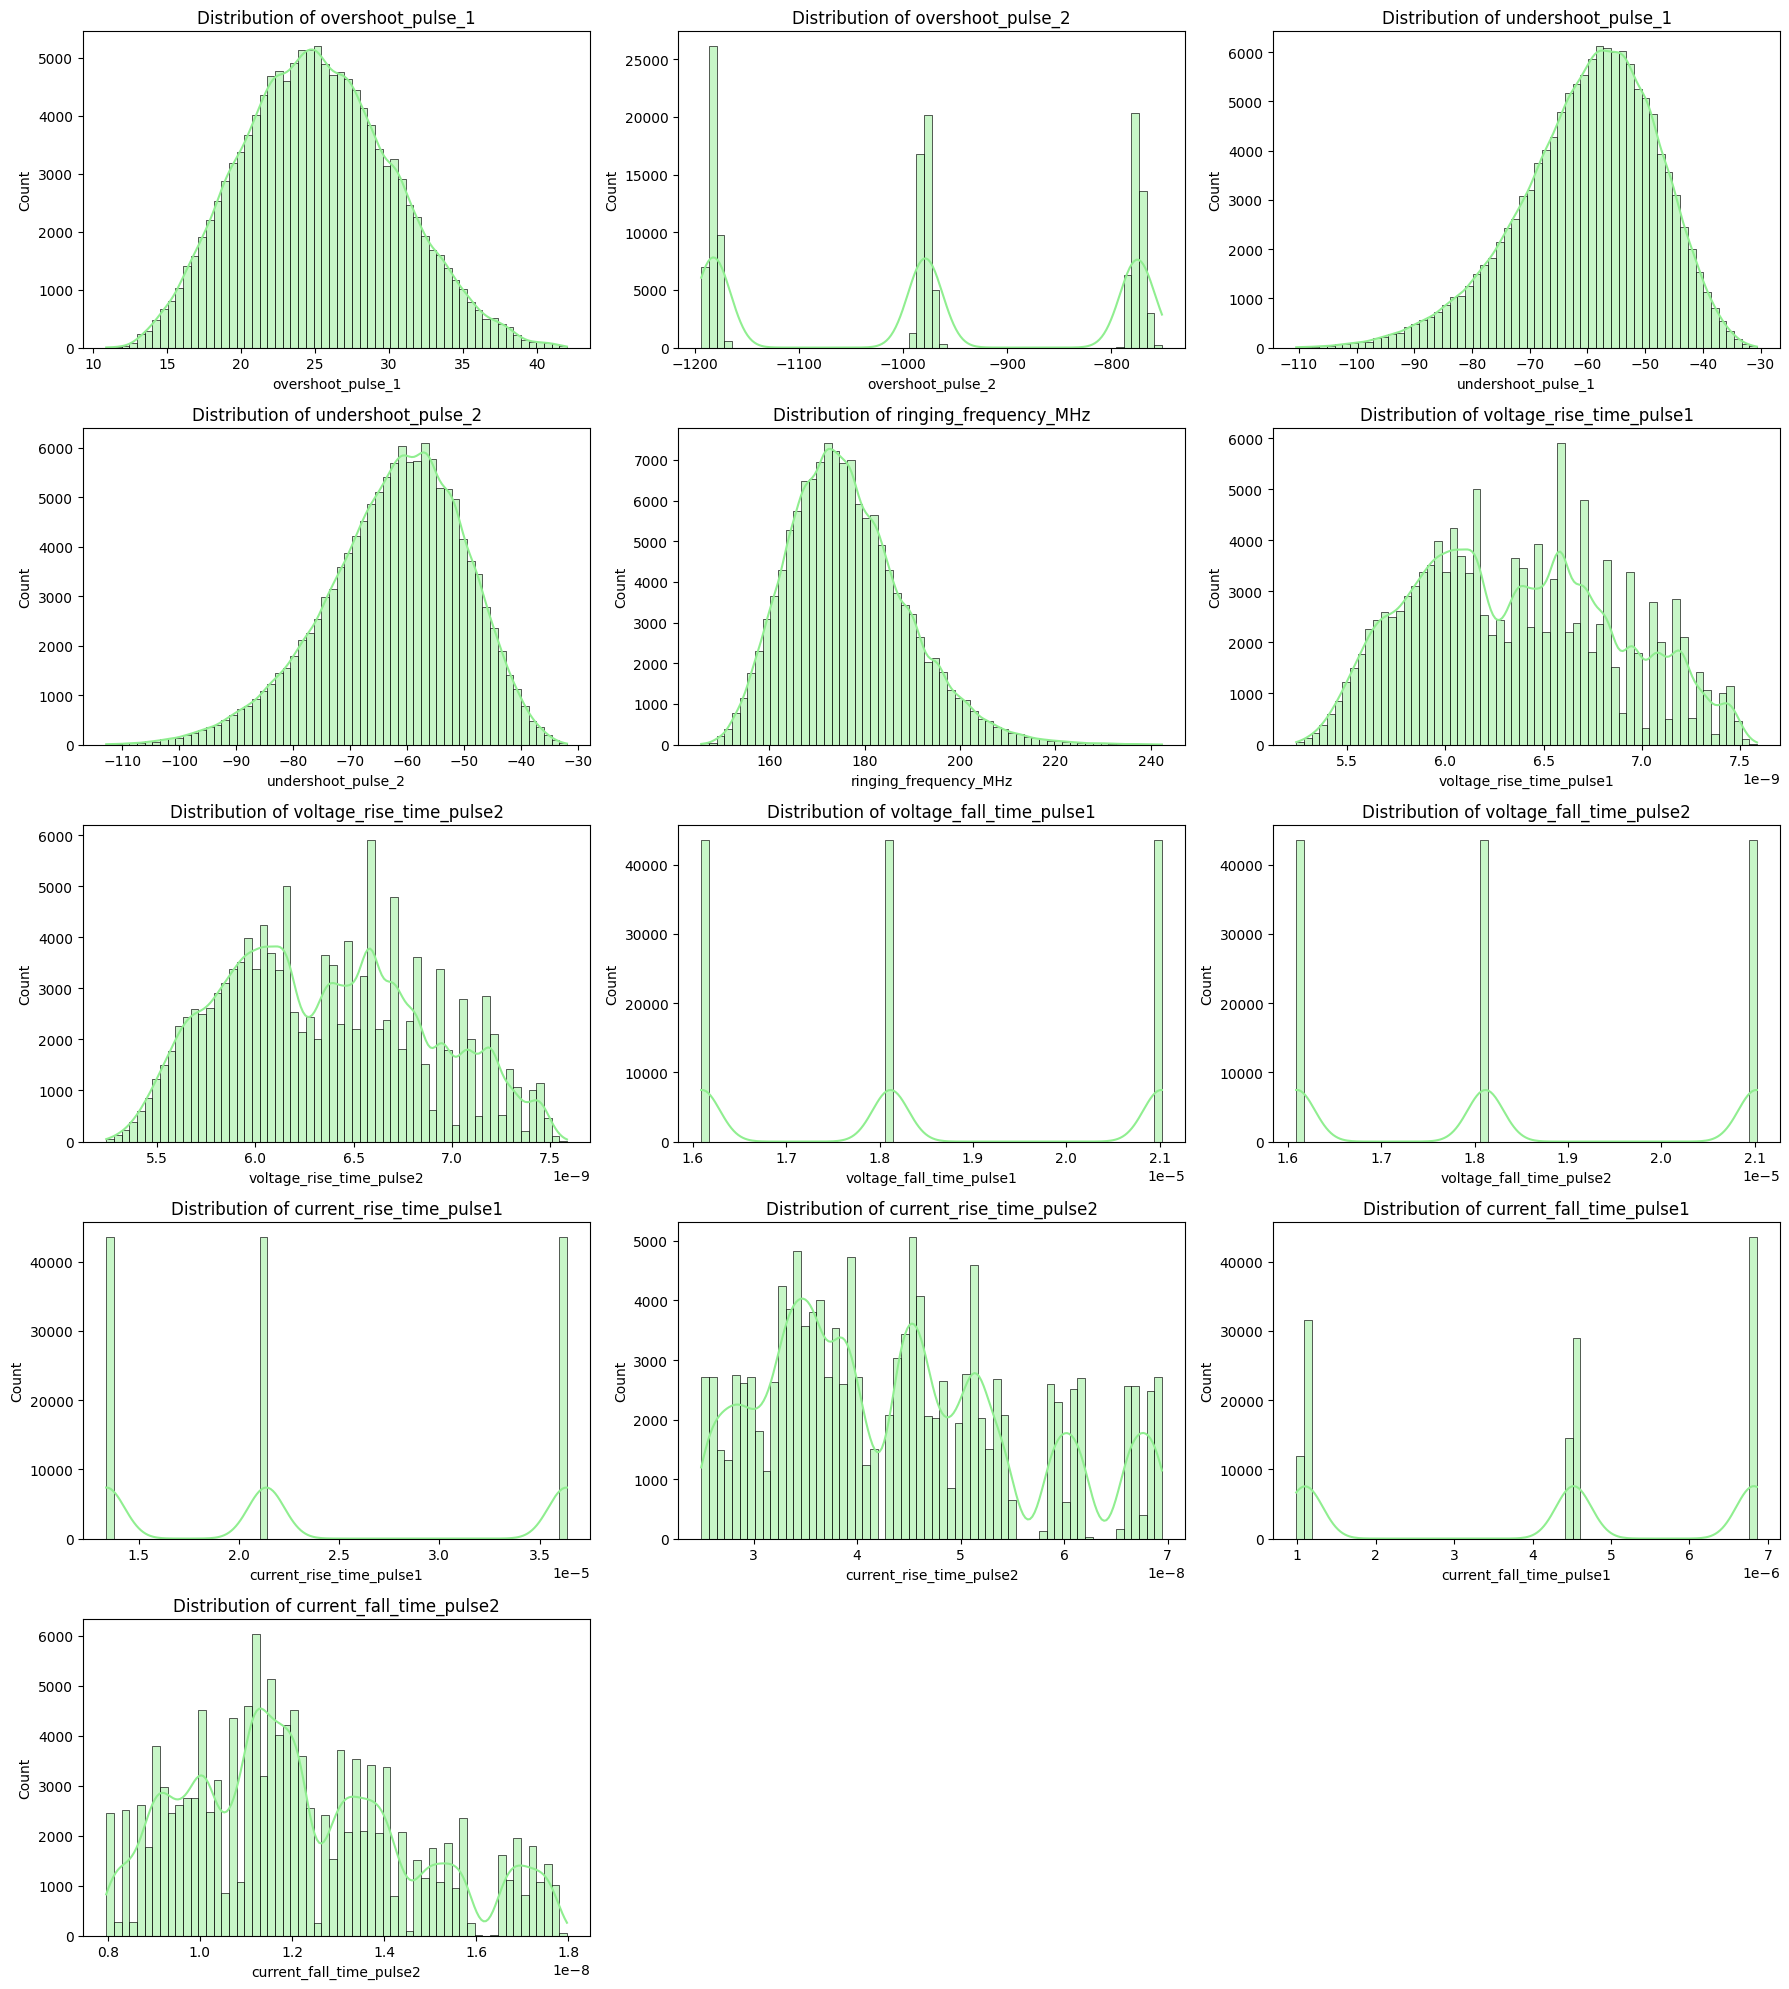

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EMI Columns
target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz',
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]
df_filtered = df_cleaned.copy()

# negative values (should not exist for rise/fall, freq, overshoot)
null_counts = df_filtered[target_columns].isnull().sum()
print("Null Value Count Per Target Column:")
print(null_counts[null_counts > 0])

rise_fall_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]

check_negative = df_filtered[rise_fall_columns].lt(0)
negative_counts = check_negative.sum()
print("\nNegative Value Count (Rise/Fall Columns Only):")
print(negative_counts[negative_counts > 0]) 
#IQR-based outliers
outlier_stats = {}
for col in target_columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers),
        'range': df_filtered[col].max() - df_filtered[col].min()
    }

summary_df = pd.DataFrame(outlier_stats).T
print("\nFinal IQR-based Outlier Summary:")
display(summary_df)

n_cols = 3
n_rows = (len(target_columns) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    sns.histplot(df_filtered[col], bins=60, kde=True, ax=axs[i], color='lightgreen')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")
for j in range(len(target_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df_filtered.to_csv('mosfets_step3_final_cleaned/C2M1000170D_cleaned.csv', index=False)
print("Saved to: mosfets_step3_final_cleaned/C2M1000170D_cleaned.csv")